## Importing imp libs 

In [1]:
# import sys
# !{sys.executable} -m pip install numpy
# import sys
# !{sys.executable} -m pip install pandas
# import sys
# !{sys.executable} -m pip install matplotlib.pyplot
# import sys
# !{sys.executable} -m pip install seaborn
# import sys
# !{sys.executable} -m pip install sklearn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## 2. Data collection and preprocessing

In [3]:
titanic_dataset=pd.read_csv("titanic/train.csv")
titanic_dataset.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
titanic_dataset.shape

(891, 12)

891-> passenger<br>
11 -> features<br>
1 -> target column(survived)<br>

In [5]:
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


numerical_col = 0,1,2,5,6,7,9<br>
object_col = 3,4,8,10,11<br>

## 3. Handling null values

In [6]:
titanic_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

from the above data we can drop the cabin column but not the age column

In [7]:
# removing cabin column
titanic_dataset.drop(columns='Cabin',axis=1,inplace=True)

In [8]:
titanic_dataset

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Embarked  
0        0         A/5 21171   7.2500        S  
1        0          PC 17599  71.2833        C  
2        0  STON/O2. 3101282   7.9250        S  
3        0            113803  53.1000        S  
4        0            373450   8.0500        S  
..     ...               ...      ...      ...  
886      0            211536  13.0000        S  
887      0            112053  30.0000        S  
888      2        W./C. 6607  23.4500        S  
889      0            111369  30.0000        C  
890      0            370376   7.7500        Q  

[891 rows x 11 columns]

In [9]:
# replacing age null with mean
titanic_dataset['Age'].fillna(titanic_dataset['Age'].mean(),inplace=True)

In [10]:
titanic_dataset.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [11]:
# replacing embrak null value with mode because it only has 3 unique ele 
titanic_dataset['Embarked'].fillna(titanic_dataset['Embarked'].mode()[0],inplace=True)

## 4. Data analysis

In [12]:
# getting statiscal data
titanic_dataset.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   13.002015    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   29.699118    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [13]:
titanic_dataset['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

## 5. Data visualization

In [14]:
sns.set()
# this line provides the theme to the plots..

<AxesSubplot: xlabel='Survived', ylabel='count'>

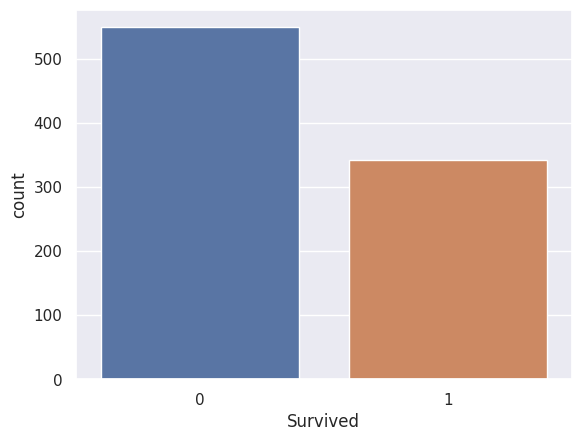

In [15]:
# drawning count_plot for survived column
sns.countplot(data=titanic_dataset, x='Survived')

<AxesSubplot: xlabel='Sex', ylabel='count'>

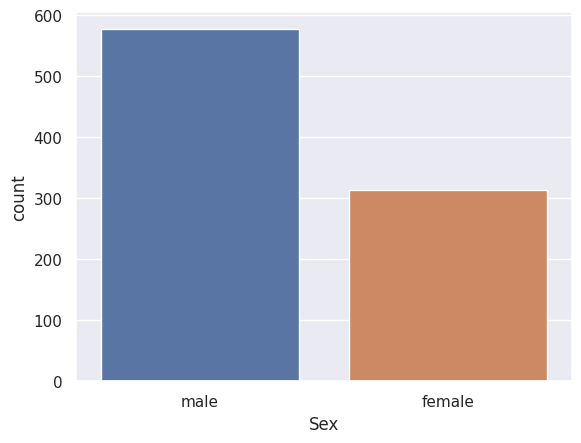

In [16]:
# drawing countplot for Sex
sns.countplot(data=titanic_dataset,x='Sex')

<AxesSubplot: xlabel='Survived', ylabel='count'>

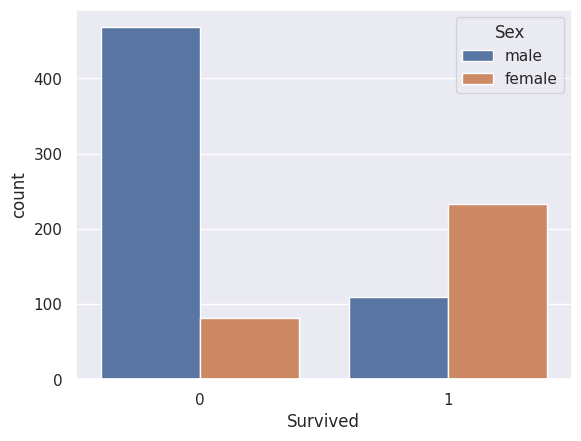

In [17]:
#drawing countplot for survival a/c to sex
sns.countplot(data=titanic_dataset,x='Survived',hue='Sex')

<AxesSubplot: xlabel='Pclass', ylabel='count'>

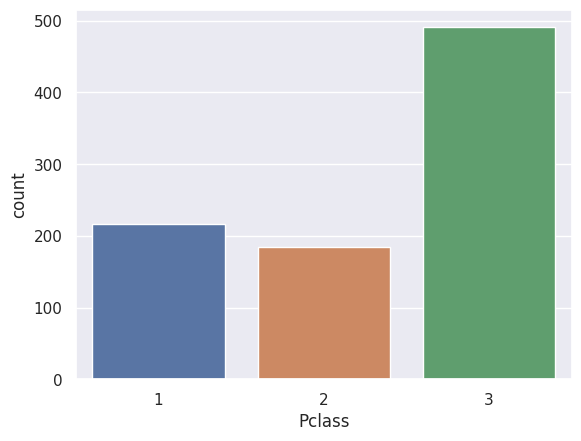

In [18]:
# countplot for pclass
sns.countplot(titanic_dataset, x='Pclass')

<AxesSubplot: xlabel='Pclass', ylabel='count'>

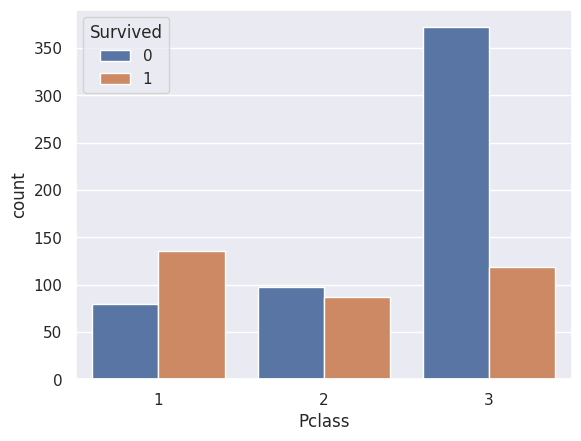

In [19]:
# pclass survival
sns.countplot(titanic_dataset, x='Pclass',hue='Survived')

<AxesSubplot: xlabel='Age', ylabel='count'>

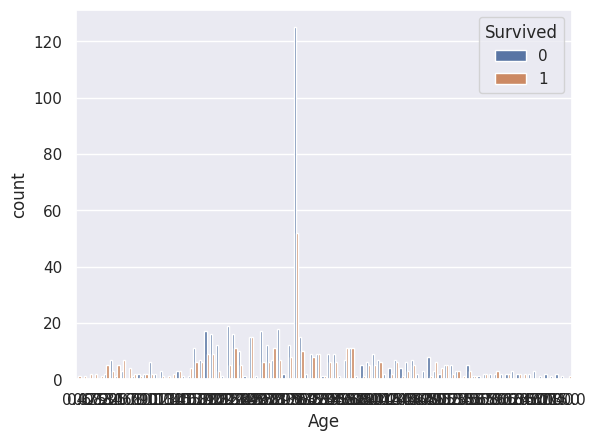

In [20]:
sns.countplot(titanic_dataset,x='Age',hue='Survived')
# this graph is not clear so here it is good to use group of age for plotting

## 6. Data preprosessing

In [21]:
titanic_dataset

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                                 ...     ...        ...   
886                              Montvila, Rev. Juozas    male  27.000000   
887                       Graham, Miss. Margaret Edith  female  19.000000   
888           Johnston, Miss. Catherine Helen "Carrie"  female  29.699118   
889                              Behr, Mr. Karl Howell    male  26.000000   
890                                Dooley, Mr. Patrick    male  32.000000   

     SibSp  Parch            Ticket     Fare Embarked  
0        1      0         A/5 21171   7.2500        S  
1        1      0          PC 17599  71.2833        C  
2        0      0  STON/O2. 3101282   7.9250        S  
3        1      0            113803  53.1000        S  
4        0      0            373450   8.0500        S  
..     ...    ...               ...      ...      ...  
886      0      0            211536  13.0000        S  
887      0      0            112053  30.0000        S  
888      1      2        W./C. 6607  23.4500        S  
889      0      0            111369  30.0000        C  
890      0      0            370376   7.7500        Q  

[891 rows x 11 columns]

In [24]:
# droping some unneccsory columns
titanic_dataset.drop(['Name',"PassengerId",'Ticket'],axis=1,inplace=True)

In [27]:
#replacing object column with numerical columns
titanic_dataset.value_counts('Sex')

Sex
male      577
female    314
dtype: int64

In [31]:
titanic_dataset.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)
titanic_dataset

Survived  Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0           0       3    0  22.000000      1      0   7.2500         0
1           1       1    1  38.000000      1      0  71.2833         1
2           1       3    1  26.000000      0      0   7.9250         0
3           1       1    1  35.000000      1      0  53.1000         0
4           0       3    0  35.000000      0      0   8.0500         0
..        ...     ...  ...        ...    ...    ...      ...       ...
886         0       2    0  27.000000      0      0  13.0000         0
887         1       1    1  19.000000      0      0  30.0000         0
888         0       3    1  29.699118      1      2  23.4500         0
889         1       1    0  26.000000      0      0  30.0000         1
890         0       3    0  32.000000      0      0   7.7500         2

[891 rows x 8 columns]

In [34]:
# Separating features and target
#x -> features , y-> target
y=titanic_dataset.Survived
x=titanic_dataset.drop(['Survived'],axis=1)

In [35]:
x

Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]

In [36]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## 7. Splitting the dataset into train,test

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y)

In [39]:
print(x.shape, X_train.shape, X_test.shape)

(891, 7) (668, 7) (223, 7)


## 8. Model training

In [40]:
model = LogisticRegression()

In [42]:
model.fit(X_train,Y_train)

/home/anuj/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## 9. Evaluating model

In [45]:
X_pred=model.predict(X_test)

In [46]:
logisticRegression_accuracy_score=accuracy_score(Y_test,X_pred)

In [47]:
logisticRegression_accuracy_score

0.7757847533632287